<a href="https://colab.research.google.com/github/istahadul07/Python_withML_BlackOrigin/blob/main/C221059_TW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving diabetes.csv to diabetes (1).csv
Model Performance:

                    Model  Accuracy  F1 Score    Recall       TPR       FPR
0  Support Vector Machine  0.753247  0.641509  0.618182  0.618182  0.171717
2             Naive Bayes  0.753247  0.660714  0.672727  0.672727  0.202020
1           Random Forest  0.740260  0.642857  0.654545  0.654545  0.212121
3    Decision Tree (CART)  0.714286  0.607143  0.618182  0.618182  0.232323


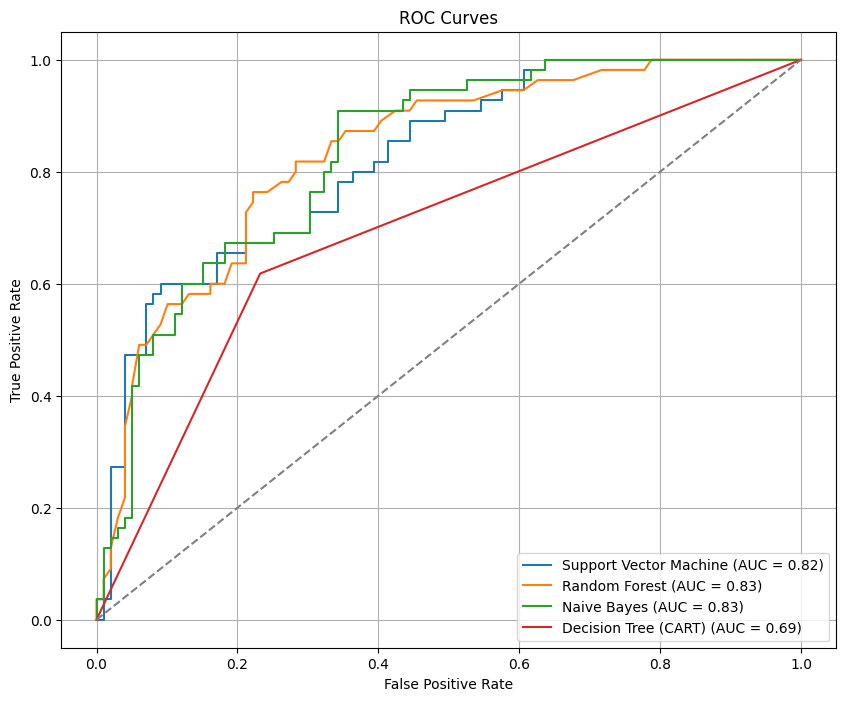

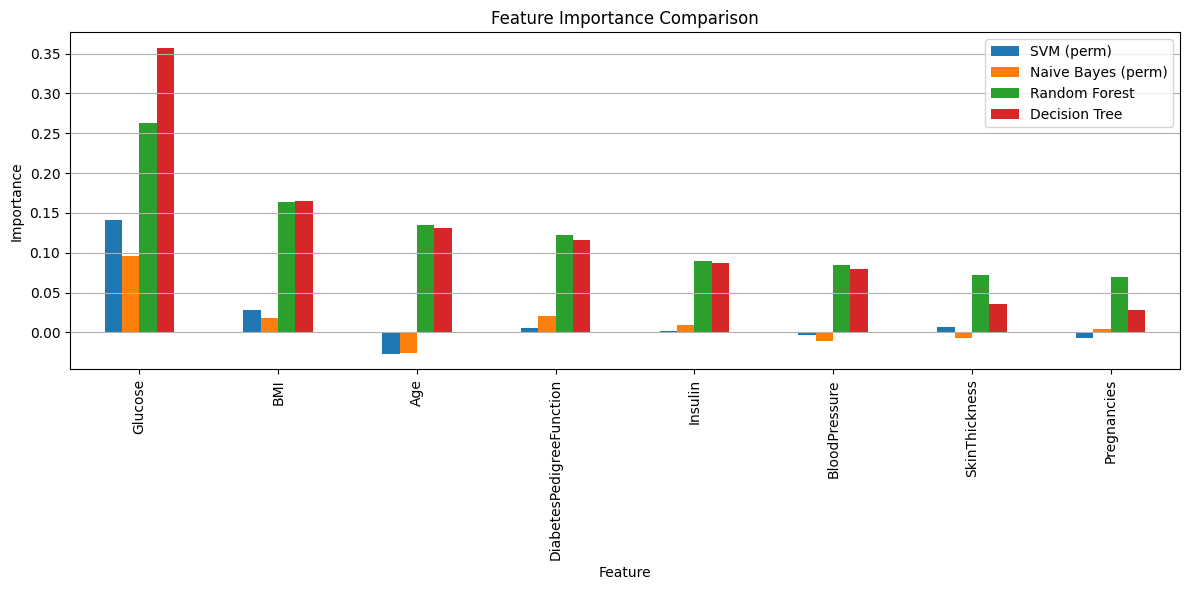

In [4]:
# Step 1: Install packages (Colab usually already has these)
!pip install scikit-learn pandas matplotlib --quiet

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

# Step 3: Load dataset (upload manually in Colab)
from google.colab import files
uploaded = files.upload()

# Replace with the filename you upload, e.g., 'diabetes.csv'
df = pd.read_csv("diabetes.csv")

# Step 4: Preprocess data
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)
df[invalid_zero_cols] = df[invalid_zero_cols].fillna(df[invalid_zero_cols].median())

X = df.drop("Outcome", axis=1)
y = df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Define models
models = {
    "Support Vector Machine": SVC(kernel="linear", probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree (CART)": DecisionTreeClassifier(random_state=42)
}

# Step 6: Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Recall": recall,
        "TPR": tpr,
        "FPR": fpr
    })

results_df = pd.DataFrame(results)
print("Model Performance:\n")
print(results_df.sort_values(by="Accuracy", ascending=False))

# Step 7: ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Step 8: Feature Importance
feature_names = X.columns.tolist()
rf_importances = models["Random Forest"].feature_importances_
dt_importances = models["Decision Tree (CART)"].feature_importances_
svm_perm = permutation_importance(models["Support Vector Machine"], X_test, y_test, n_repeats=10, random_state=42)
nb_perm = permutation_importance(models["Naive Bayes"], X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "SVM (perm)": svm_perm.importances_mean,
    "Naive Bayes (perm)": nb_perm.importances_mean,
    "Random Forest": rf_importances,
    "Decision Tree": dt_importances
}).set_index("Feature")

importance_df.sort_values("Random Forest", ascending=False).plot.bar(figsize=(12, 6))
plt.title("Feature Importance Comparison")
plt.ylabel("Importance")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
